In [83]:
import  cv2
import tkinter
import numpy as np
from matplotlib import pyplot as plt

#定義Enhancement，<x1,x2>為增強區間
def linear_threshold(Image,h,w,x1,x2,z2,z1 = 0,z3 = 0):
    for i in range(0, h):
        for j in range(0, w):
            tmp = Image[i, j]
            if tmp < x1: # < x1 給 0
                Image[i, j] = z1
            elif tmp >= x1 and tmp < x2: # x1 <= tmp  < x2 給 z2
                Image[i, j] = z2
            else:
                Image[i, j] = z3 # 其他都給 0
    return Image

#輪廓面積計算函數
def areaCal(contour):
    area = 0
    #print(len(contour))
    for i in range(len(contour)):
        area += cv2.contourArea(contour[i])
    return area

(613, 1003)


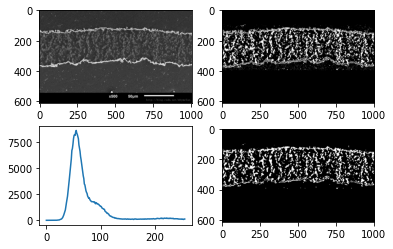

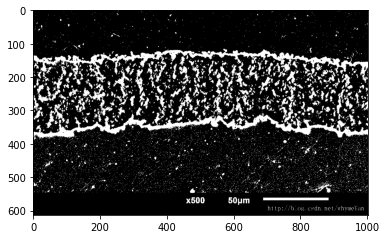

In [87]:
#if __name__ == '__main__':
#input picture
img = cv2.imread('./img/pic.png',0)
ret, bimg = cv2.threshold(img, 75, 255, cv2.THRESH_BINARY) #二值化
# set mask 取 width, height
mask = np.zeros(img.shape[:2],np.uint8)
print(mask.shape)
# 掩蓋尺寸
mask[100:399, 0:1000] = 255
masked_img = cv2.bitwise_and(bimg, img, mask = mask)
# 直方圖
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])
# 將前景凸顯，增強圖像Feature，Thresh<26,200>是依據直方圖像粗略估計得到，
# 直方圖會影響區域範圍
threshold_image = linear_threshold(masked_img,613,1003,26,200,255)
#中值濾波
median1 = cv2.medianBlur(threshold_image,5)
# Plot
plt.subplot(2,2,1),plt.imshow(img,'gray')
plt.subplot(2,2,2),plt.imshow(threshold_image,'gray')
plt.subplot(2, 2, 3), plt.plot(hist_mask) #
plt.subplot(2, 2, 4), plt.imshow(median1, 'gray')
plt.show()
plt.imshow(bimg, 'gray')

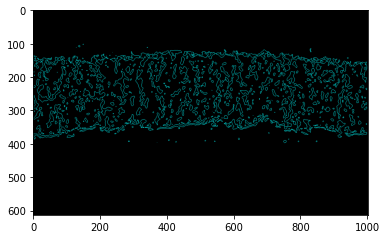

Mask area: 50873.0
Picture Area 614839
Mask Area Rate: 8.2742 %


In [88]:
Image = np.zeros(img.shape[:2], np.uint8)
#cv2.findContours（）
#有三個參數：1、輸入圖像；2、輪廓；3、層析結構。 CV2新版:1、輪廓；2、層析結構
#返回值有三個，其中第二個返回值是python列表，儲存所有輪廓，且每一個輪廓都是Numpy數組，
#包含對象邊界（x,y）座標，其餘兩個返回值可參考openCV文檔。
contours,hierarchv = cv2.findContours(median1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)   
color = cv2.cvtColor(Image,cv2.COLOR_GRAY2BGR)
#將輪廓在Image中生成
Image = cv2.drawContours(color, contours,-1,(0,255,255),1)
plt.imshow(Image)
plt.show()
#得到輪廓面積並列印
CalArea = areaCal(contours)
Area =img.shape[0]*img.shape[1]
print('Mask area:',CalArea)
print('Picture Area', area)
print('Mask Area Rate:', round(CalArea/Area * 100, 4), '%')